In [1]:
from rerf.urerf import UnsupervisedRandomForest

In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest

In [13]:
# Load dataset
iris = datasets.load_iris()

In [14]:
X = iris.data

In [15]:
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)
print(clf)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


In [16]:
clf.fit(X)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)

In [17]:
sim_mat = clf.transform()
print(sim_mat)

[[1.   0.04 0.07 ... 0.   0.   0.  ]
 [0.06 1.   0.19 ... 0.   0.   0.  ]
 [0.07 0.13 1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.05 0.06]
 [0.   0.   0.   ... 0.06 1.   0.01]
 [0.   0.   0.   ... 0.12 0.03 1.  ]]


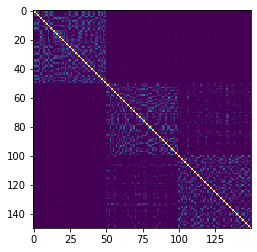

In [18]:
plt.imshow(sim_mat)

In [49]:
clf1 = UnsupervisedRandomForest(projection_matrix="RerF", random_state=1)
print(clf1)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=1)


[[1.   0.11 0.08 ... 0.   0.   0.  ]
 [0.08 1.   0.23 ... 0.   0.   0.  ]
 [0.1  0.17 1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.02 0.07]
 [0.   0.   0.   ... 0.04 1.   0.  ]
 [0.   0.01 0.   ... 0.09 0.01 1.  ]]


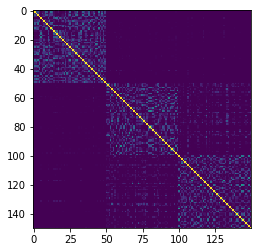

In [50]:
clf1.fit(X)
sim_mat1 = clf1.transform()
print(sim_mat1)
plt.imshow(sim_mat1)

In [23]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(iris.target, predict_labels)

print("labels\n", iris.target)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Adjusted Rand Score: 0.745503868180448


In [25]:
clf_test = UnsupervisedRandomForest(feature_combinations='log2', projection_matrix="RerF", random_state=0)
print(clf_test)

UnsupervisedRandomForest(feature_combinations='log2', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


[[1.   0.06 0.09 ... 0.   0.   0.  ]
 [0.12 1.   0.2  ... 0.   0.   0.  ]
 [0.1  0.19 1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.06 0.07]
 [0.   0.   0.   ... 0.05 1.   0.02]
 [0.   0.   0.   ... 0.11 0.   1.  ]]


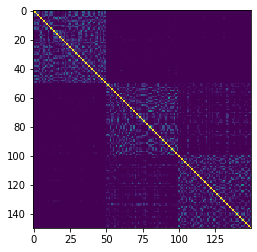

In [26]:
#Fit the changed parameter classifier to the samples
clf_test.fit(X)
sim_mat_test = clf_test.transform()
print(sim_mat_test)
plt.imshow(sim_mat_test)

In [27]:
cluster_test = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predict_labels1 = cluster_test.fit_predict(sim_mat_test)
score1 = adjusted_rand_score(iris.target, predict_labels1)

print("labels\n", iris.target)
print("predict\n", predict_labels1)
print("Adjusted Rand Score:", score1)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Adjusted Rand Score: 0.6333560373711087


In [29]:
#Changing the feature combinations from 'auto' to 'log2' reduces the adjusted rand score to 0.635
#mis-predicted all 0's as 1's and all 2's as 0's
#No visible change in plot of sim matrix?

In [31]:
clf_test2 = UnsupervisedRandomForest(feature_combinations=None, projection_matrix="RerF", random_state=0)
print(clf_test2)

UnsupervisedRandomForest(feature_combinations=None, max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


[[1.   0.08 0.05 ... 0.   0.   0.  ]
 [0.04 1.   0.25 ... 0.   0.   0.  ]
 [0.06 0.19 1.   ... 0.   0.   0.  ]
 ...
 [0.   0.01 0.   ... 1.   0.04 0.13]
 [0.   0.   0.   ... 0.04 1.   0.  ]
 [0.   0.01 0.   ... 0.07 0.02 1.  ]]


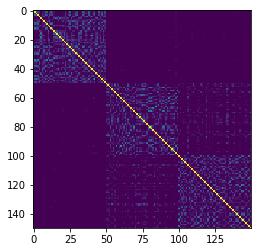

In [32]:
#Fit the changed parameter classifier to the samples
clf_test2.fit(X)
sim_mat_test2 = clf_test2.transform()
print(sim_mat_test2)
plt.imshow(sim_mat_test2)

In [33]:
cluster_test2 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predict_labels2 = cluster_test2.fit_predict(sim_mat_test2)
score2 = adjusted_rand_score(iris.target, predict_labels2)

print("labels\n", iris.target)
print("predict\n", predict_labels2)
print("Adjusted Rand Score:", score2)


labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 2 0 2 2
 0 2 0 0 2 0 2 2 0 2 0 2 0 2 2 0 0 0 2 2 2 0 0 0 2 2 0 0 2 2 2 0 2 2 2 0 2
 2 0]
Adjusted Rand Score: 0.663433743503878


In [34]:
#Lesser misclassification for taking all the features?

In [35]:
print(X.shape)

(150, 4)


In [41]:
clf_test3 = UnsupervisedRandomForest(feature_combinations=None, max_depth=1,projection_matrix="RerF", random_state=0)
print(clf_test3)

UnsupervisedRandomForest(feature_combinations=None, max_depth=1,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


[[1.   0.42 0.44 ... 0.   0.08 0.08]
 [0.35 1.   0.27 ... 0.13 0.   0.19]
 [0.56 0.5  1.   ... 0.   0.09 0.08]
 ...
 [0.   0.1  0.   ... 1.   0.38 0.39]
 [0.15 0.   0.14 ... 0.39 1.   0.28]
 [0.06 0.18 0.06 ... 0.47 0.35 1.  ]]


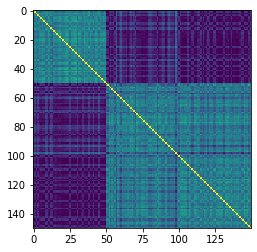

In [42]:
#Fit the changed parameter classifier to the samples
clf_test3.fit(X)
sim_mat_test3 = clf_test3.transform()
print(sim_mat_test3)
plt.imshow(sim_mat_test3)

In [43]:
cluster_test3 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predict_labels3 = cluster_test3.fit_predict(sim_mat_test3)
score3 = adjusted_rand_score(iris.target, predict_labels3)

print("labels\n", iris.target)
print("predict\n", predict_labels3)
print("Adjusted Rand Score:", score3)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2
 0 0 0 0 2 0 2 0 0 2 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0
 2 0]
Adjusted Rand Score: 0.5389317398859791


In [44]:
#Limited max_dept to 1, adjusted rand score decreases.

In [45]:
clf_test4 = UnsupervisedRandomForest(feature_combinations=None, max_depth=1000,projection_matrix="RerF", random_state=0)
print(clf_test4)

UnsupervisedRandomForest(feature_combinations=None, max_depth=1000,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)


[[1.   0.07 0.01 ... 0.   0.   0.  ]
 [0.08 1.   0.17 ... 0.   0.   0.  ]
 [0.11 0.22 1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.01 0.06]
 [0.   0.   0.   ... 0.06 1.   0.02]
 [0.   0.   0.   ... 0.08 0.01 1.  ]]


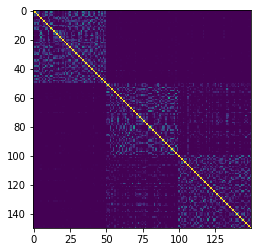

In [46]:
#Fit the changed parameter classifier to the samples
clf_test4.fit(X)
sim_mat_test4 = clf_test4.transform()
print(sim_mat_test4)
plt.imshow(sim_mat_test4)

In [47]:
cluster_test4 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
predict_labels4 = cluster_test4.fit_predict(sim_mat_test4)
score4 = adjusted_rand_score(iris.target, predict_labels4)

print("labels\n", iris.target)
print("predict\n", predict_labels4)
print("Adjusted Rand Score:", score4)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
predict
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Adjusted Rand Score: 0.644447235392006


In [48]:
#Change of max dept - 1000 

In [51]:
#Brief summary of changing hyperparameters of USPORF
#1. Ran the Usprof code as is on the iris dataset.
#2. Changing random_state makes no difference as it is used to just control the variablity of the o/p
#3. Changed the feature_combinations = log2 & None and observed a decrease in the ajusted rand score values compared to taking sqrt feature comninations
#4. Changed max_dept = 1 & max_dept = 1000 and saw a difference in the plot of sim_mat for the constricting the depth of the tree to 1, no noticable differnce for max_dept = 1000, but does this mean it would have overfit for the data?

